# 딥러닝 기초설정

In [90]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [92]:
mnist = pd.read_csv('C:/Users/Han/Desktop/Deep/handwriting.csv')

## 데이터 분리하기

In [257]:
np.random.seed(seed=0)
col = np.random.randint(1,372036,30000)
data = mnist.iloc[col,:]
data = data.reset_index(drop=True)

In [258]:
target = data.iloc[:,0].values.reshape(-1,1)
features = data.iloc[:, 1:]
print("Target shape:" + str(target.shape))
print("Features shape:" + str(features.shape))

Target shape:(30000, 1)
Features shape:(30000, 784)


## 데이터 시각화

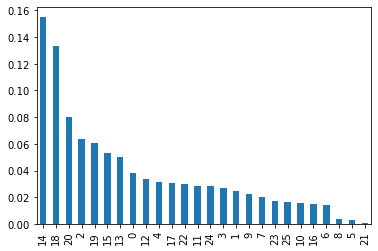

In [265]:
pd.DataFrame(target)[0].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

In [153]:
lis = []
for x in range(0,26):
    w = data.index[ data.iloc[:,0] == x].min()
    lis.append(w)

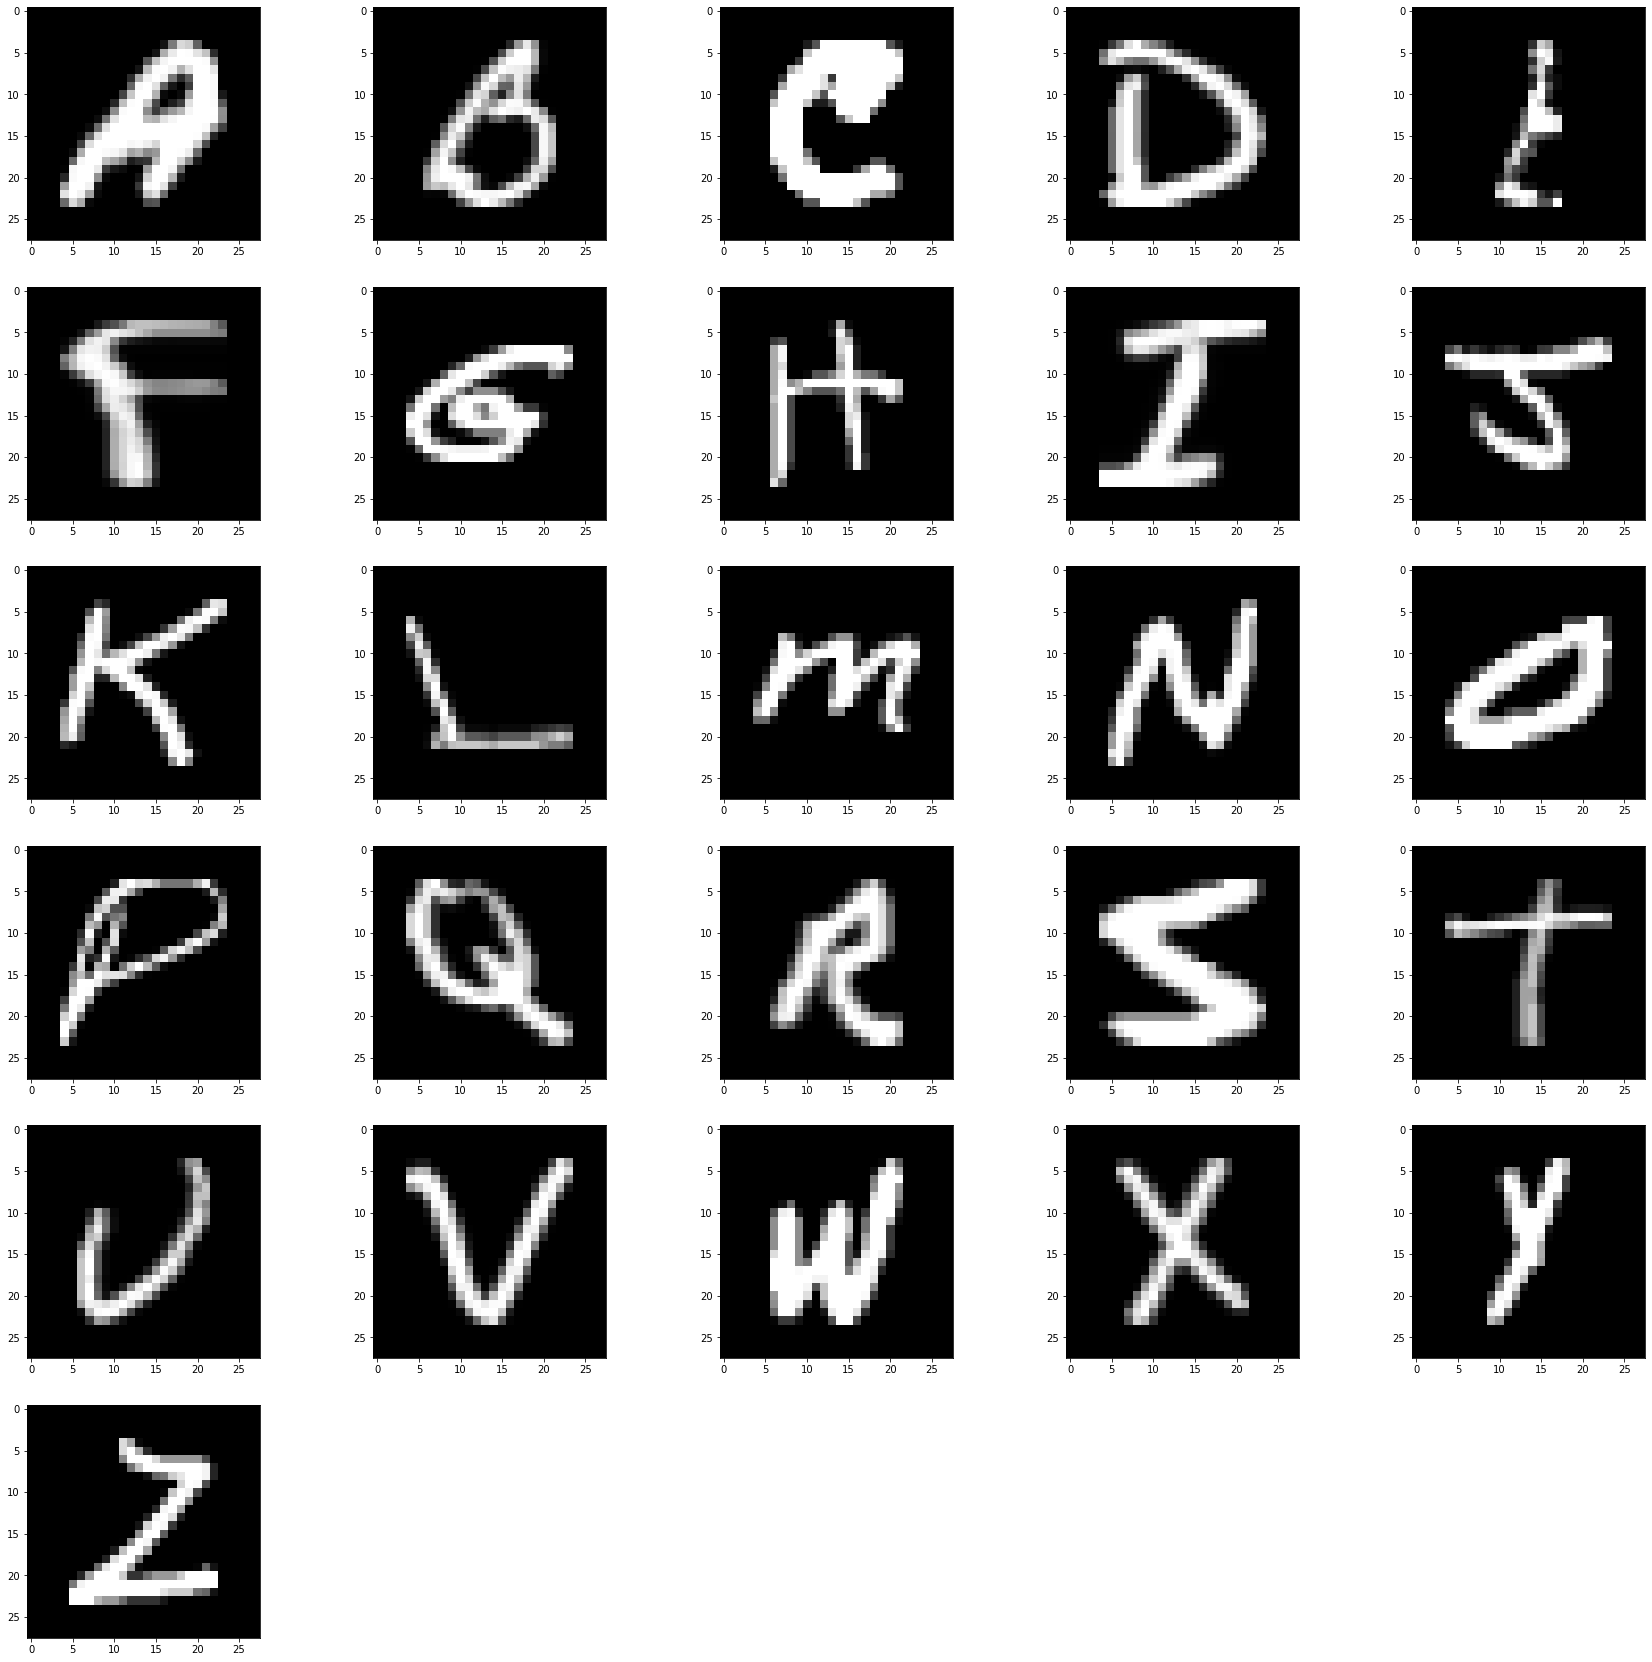

In [154]:
plt.figure(figsize=(30,30))
for x in lis:
    plt.subplot(6,5,1+lis.index(x))
    plt.imshow(np.array(data.iloc[x,1:785]).reshape((28,28)),cmap='gray')

In [155]:
target = data.iloc[:,0].values.reshape(-1,1)
features = data.iloc[:, 1:]
print("Target shape:" + str(target.shape))
print("Features shape:" + str(features.shape))

Target shape:(30000, 1)
Features shape:(30000, 784)


In [156]:
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)

In [157]:
img_rows, img_cols = 28, 28 # imput/ouput 의 크기이다. 
input_shape = (img_rows, img_cols, 1)

target2 = to_categorical(target.copy()) # category 데이터로 바꾸기
X_train, X_test, y_train, y_test = train_test_split(features, target2, test_size=0.3, random_state=42) # train / test set 으로 

X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.values.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


In [158]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 28, 28, 1)
(9000, 28, 28, 1)
(21000, 26)
(9000, 26)


# Basic model

## 모델 세우기

In [215]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [216]:
def basic_cnn():
    model = Sequential()  
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 5, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    # input_shape : 가장 첫 Layer 이기 때문에 input_shape 을 지정해줍니다. (x,y,a)
    #             : 앞의 두 (x,y) 는 input image 의 shape 입니다.
    #             : 맨 마지막은 데이터의 차원입니다. 흑백이면 1, 컬려면 3 을 넣습니다.
    #             : 데이터가 흑백 이미지이기 때문에 컬러 채널에 해당하는 세번째 숫자가 1 이 됩니다. #컬러면 RGB로 3이됩니다.
    # kernel_size : Conv Layer 의 검사영역(receptive field) 입니다. 
    #             : (3,3)는 한번에 3x3 만큼의 영역을 계산해서 다음 Layer 의 출력을 구합니다. 
    # filters : 몇 개의 다른 종류의 필터를 활용할 것인지를 나타냄. 출력 모양의 깊이(depth) 를 결정한다.
    # strides : 연산을 수행할 때 윈도우가 가로 그리고 세로로 움직이면서 내적 연산을 수행하는데, 한 번에 얼마나 움직일지를 의미한다.
    # padding :'same' 이면 같은 dim 을 유지해줍니다. (zero padding 을 사용하기 떄문)
    #         :'valid' 이면 dim 이 줄어듭니다. (zero padding 을 사용하지 않아서)
    
    model.add(Activation('relu'))
    # activation 은 relu 를 씁니다.
    
    model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
    # MaxPool 은 이 Layer 가 계산하는 영역에서 Max 값만 남기는 연산을 하는 Pool Layer 입니다.
    # pool_size : 한번에 계산하는 영역입니다. 
    # strides : x 축과 y 축으로 계산 영역이 이동하는 step 수입니다. 지정되지 않았다면(None), strides 는 pool_size 로 자동 지정됩니다.
    # pool_size 와 strides 를 조합하면 이 (2,2) ,(2,2) Pool Layer 를 통과한 이미지의 높이와 너비는 절반으로 줄어들게 됩니다.
    
    model.add(Flatten())
    # Dense layer 로 가기 위해서는 데이터가 flatten형태로 변해야 합니다.

    #model.add(Dense(50, activation = 'relu'))
    # 이떄 추가되는 dense 는 hidden layer 층으로, 50개의 nodes 그리고 actication function 은 relu 로 가진다.
    
    model.add(Dense(26, activation = 'softmax'))
    # classify 한 result 가 출력되는 구간이다.
    # 알파벳이 26개의 label 을 가지고 있기 때문에 26을 지정해준다.
    
    adam = optimizers.Adam()
    # adam optimizer 는 현재 표준적으로 가장 성능이 뛰어난 optimizer 입니다.
    # 대부분 이 opytimizer 을 쓴다.
    
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    # classification 에서 카테고리가 2개 이상일 때 loss 로 categorical_crossentropy 를 사용합니다. 
    # metrics 는 모델의 퍼포먼스를 판단하기 위한 함수입니다. 여기서는 정확도를 사용합니다.
    
    return model    

In [217]:
model = basic_cnn()

In [218]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
activation_61 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 5)         0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 980)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 26)                25506     
Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
_________________________________________________________________


 batch_size
 
 배치사이즈는 몇 문항을 풀고 해답을 맞추는 지를 의미합니다. 100문항일 때, 배치사이즈가 100이면 전체를 다 풀고 난 뒤에 해답을 맞춰보는 것입니다. 우리가 해답을 맞춰볼 때 ‘아하, 이렇게 푸는구나’라고 느끼면서 학습하는 것처럼 모델도 이러한 과정을 통해 가중치가 갱신됩니다.
문제를 푼 뒤 해답과 맞춰봐야 학습이 일어납니다. > 모델의 결과값과 주어진 라벨 값과의 오차를 줄이기 위해, `역전파(Backpropagation)` 알고리즘으로 가중치가 갱신됩니다.

In [220]:
%%time
history = model.fit(X_train, y_train, batch_size = 50 , validation_split = 0.2, epochs = 5, verbose = 1)
# batch size: 한 번의 batch마다 주는 데이터 샘플의 size.
#           : 배치사이즈가 작을수록 가중치 update가 자주 일어납니다.
# epochs  : 에포크 3은 전체 데이터를 3번 이용한다는 것을 의미합니다. 
#         : 같은 문제집을 여러 번 풀면서 점차 학습되듯이 모델도 같은 데이터셋으로 반복적으로 가중치를 갱신하면서 모델이 학습됩니다. 
# validation_split : 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도도 함께 출력되는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않습니다. 
#                  : 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용합니다. 
# verbose = 1 : 학습이 진행되는지 지켜볼 수 있게 해준다.


Train on 16800 samples, validate on 4200 samples
Epoch 1/5
16800/16800 [==============================] - 3s 176us/step - loss: 0.4890 - accuracy: 0.8671 - val_loss: 0.5480 - val_accuracy: 0.8560
Epoch 2/5
16800/16800 [==============================] - 3s 178us/step - loss: 0.4785 - accuracy: 0.8696 - val_loss: 0.5410 - val_accuracy: 0.8557
Epoch 3/5
16800/16800 [==============================] - 3s 173us/step - loss: 0.4640 - accuracy: 0.8751 - val_loss: 0.5219 - val_accuracy: 0.8605
Epoch 4/5
16800/16800 [==============================] - 3s 168us/step - loss: 0.4515 - accuracy: 0.8785 - val_loss: 0.5308 - val_accuracy: 0.8595
Epoch 5/5
16800/16800 [==============================] - 3s 169us/step - loss: 0.4378 - accuracy: 0.8818 - val_loss: 0.5183 - val_accuracy: 0.8674
Wall time: 14.5 s


## Train 추이

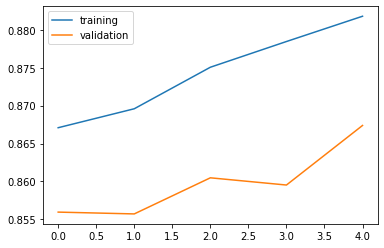

In [221]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## 틀리게 예측한 것들

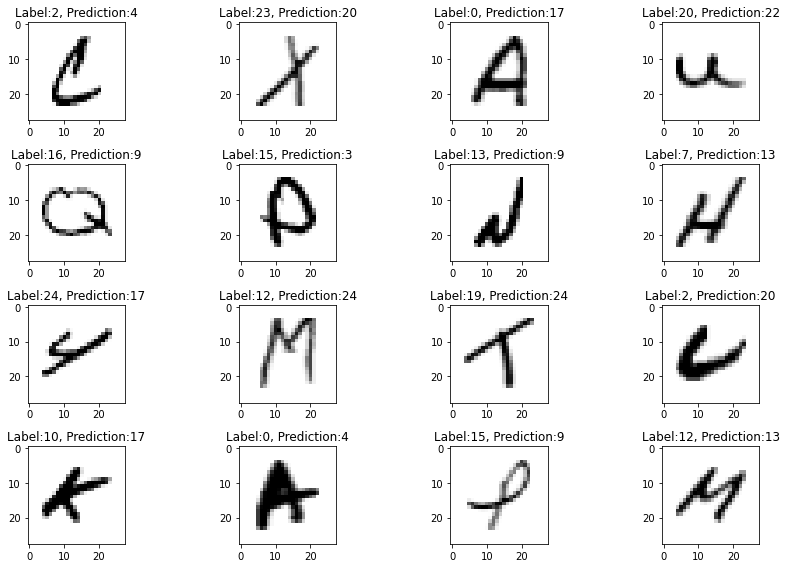

In [222]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

## 모델평가

In [223]:
results = model.evaluate(X_test, y_test)

9000/9000 [==============================] - 1s 79us/step


In [224]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8627777695655823


# Large epoch

## 모델 세우기

In [226]:
def basic_cnn():
    model = Sequential()  
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 5, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
    model.add(Flatten())
    #model.add(Dense(50, activation = 'relu'))
    model.add(Dense(26, activation = 'softmax'))
    adam = optimizers.Adam()
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

In [227]:
model = basic_cnn()

model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 28, 28, 5)         25        
_________________________________________________________________
activation_62 (Activation)   (None, 28, 28, 5)         0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 5)         0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 980)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 26)                25506     
Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
_________________________________________________________________


In [228]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 30, verbose = 1)

Train on 16800 samples, validate on 4200 samples
Epoch 1/30
16800/16800 [==============================] - 3s 175us/step - loss: 1.4421 - accuracy: 0.6093 - val_loss: 0.7067 - val_accuracy: 0.8064
Epoch 2/30
16800/16800 [==============================] - 3s 174us/step - loss: 0.6081 - accuracy: 0.8305 - val_loss: 0.5845 - val_accuracy: 0.8417
Epoch 3/30
16800/16800 [==============================] - 3s 168us/step - loss: 0.5242 - accuracy: 0.8562 - val_loss: 0.5415 - val_accuracy: 0.8552
Epoch 4/30
16800/16800 [==============================] - 3s 175us/step - loss: 0.4809 - accuracy: 0.8673 - val_loss: 0.5085 - val_accuracy: 0.8679
Epoch 5/30
16800/16800 [==============================] - 3s 188us/step - loss: 0.4490 - accuracy: 0.8773 - val_loss: 0.4943 - val_accuracy: 0.8700
Epoch 6/30
16800/16800 [==============================] - 3s 170us/step - loss: 0.4184 - accuracy: 0.8850 - val_loss: 0.4714 - val_accuracy: 0.8740
Epoch 7/30
16800/16800 [==============================] - 3s 17

## Train 추이

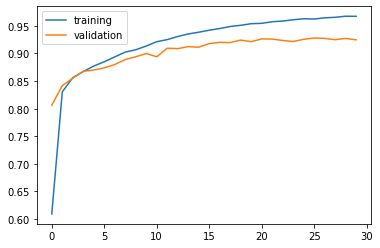

In [229]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## 틀리게 예측한 것들

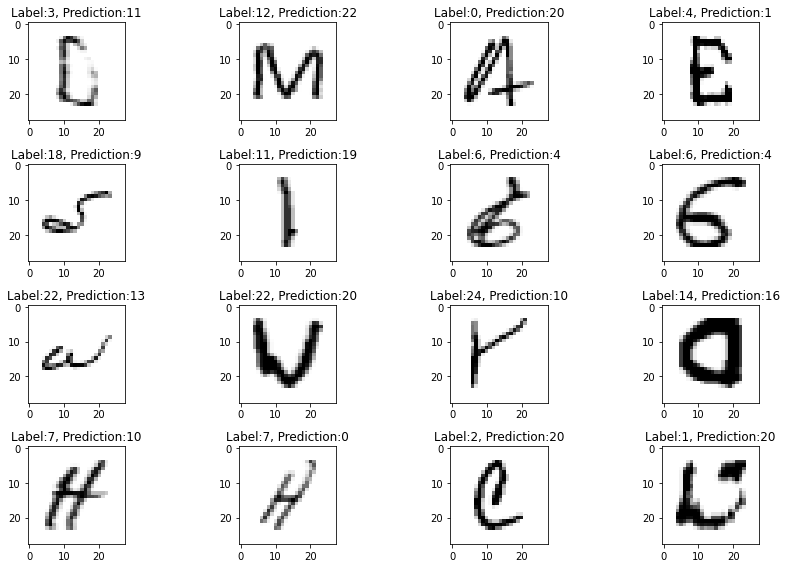

In [230]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

## 모델평가

In [231]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

9000/9000 [==============================] - 1s 83us/step
Test accuracy:  0.9303333163261414


# Large kernel with filter

## 모델 세우기

In [232]:
def large_cnn():
    model = Sequential()  
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 10, kernel_size = (4,4), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
    model.add(Flatten())
    #model.add(Dense(50, activation = 'relu'))
    model.add(Dense(26, activation = 'softmax'))
    adam = optimizers.Adam()
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

In [233]:
model = large_cnn()

model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 10)        170       
_________________________________________________________________
activation_63 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 1960)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 26)                50986     
Total params: 51,156
Trainable params: 51,156
Non-trainable params: 0
_________________________________________________________________


In [234]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 30, verbose = 1)

Train on 16800 samples, validate on 4200 samples
Epoch 1/30
16800/16800 [==============================] - 3s 207us/step - loss: 0.9660 - accuracy: 0.7373 - val_loss: 0.5746 - val_accuracy: 0.8467
Epoch 2/30
16800/16800 [==============================] - 3s 204us/step - loss: 0.4987 - accuracy: 0.8628 - val_loss: 0.4658 - val_accuracy: 0.8776
Epoch 3/30
16800/16800 [==============================] - 3s 199us/step - loss: 0.4024 - accuracy: 0.8911 - val_loss: 0.3971 - val_accuracy: 0.8943
Epoch 4/30
16800/16800 [==============================] - 3s 197us/step - loss: 0.3288 - accuracy: 0.9121 - val_loss: 0.3498 - val_accuracy: 0.9086
Epoch 5/30
16800/16800 [==============================] - 3s 200us/step - loss: 0.2762 - accuracy: 0.9257 - val_loss: 0.3108 - val_accuracy: 0.9181
Epoch 6/30
16800/16800 [==============================] - 4s 245us/step - loss: 0.2367 - accuracy: 0.9376 - val_loss: 0.2906 - val_accuracy: 0.9233
Epoch 7/30
16800/16800 [==============================] - 3s 19

## Train 추이

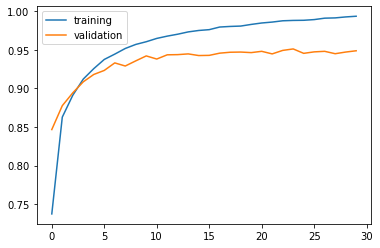

In [235]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## 틀리게 예측한 것들

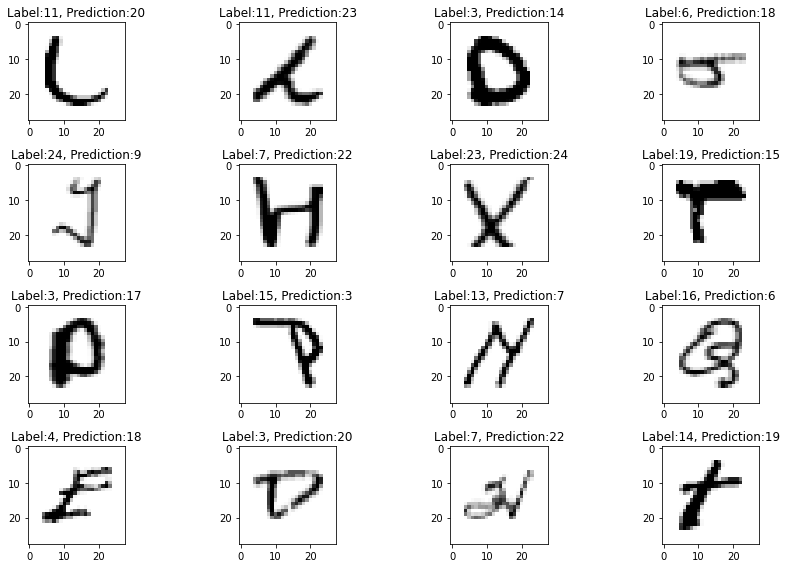

In [236]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

## 모델평가

In [237]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

9000/9000 [==============================] - 1s 98us/step
Test accuracy:  0.9471111297607422


하지만 아직 개선의 여지가 남아보인다. 저기 S 나 W 같은것들은 예측하기 쉬울텐데 왜저러지?

# Hidden layer : O

## 모델 세우기

In [238]:
def hidden_cnn():
    model = Sequential()  
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                     filters = 10, kernel_size = (4,4), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
    model.add(Flatten())
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(26, activation = 'softmax'))
    adam = optimizers.Adam()
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

In [239]:
model = hidden_cnn()

model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 28, 28, 10)        170       
_________________________________________________________________
activation_64 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 1960)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 50)                98050     
_________________________________________________________________
dense_58 (Dense)             (None, 26)                1326      
Total params: 99,546
Trainable params: 99,546
Non-trainable params: 0
_________________________________________________

In [240]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 30, verbose = 1)

Train on 16800 samples, validate on 4200 samples
Epoch 1/30
16800/16800 [==============================] - 4s 212us/step - loss: 1.0158 - accuracy: 0.7246 - val_loss: 0.5342 - val_accuracy: 0.8517
Epoch 2/30
16800/16800 [==============================] - 3s 201us/step - loss: 0.3998 - accuracy: 0.8918 - val_loss: 0.3488 - val_accuracy: 0.9093
Epoch 3/30
16800/16800 [==============================] - 3s 203us/step - loss: 0.2879 - accuracy: 0.9221 - val_loss: 0.3167 - val_accuracy: 0.9171
Epoch 4/30
16800/16800 [==============================] - 3s 195us/step - loss: 0.2255 - accuracy: 0.9380 - val_loss: 0.2639 - val_accuracy: 0.9307
Epoch 5/30
16800/16800 [==============================] - 3s 206us/step - loss: 0.1892 - accuracy: 0.9488 - val_loss: 0.2338 - val_accuracy: 0.9369
Epoch 6/30
16800/16800 [==============================] - 3s 202us/step - loss: 0.1569 - accuracy: 0.9585 - val_loss: 0.2201 - val_accuracy: 0.9407
Epoch 7/30
16800/16800 [==============================] - 3s 20

## Train 추이

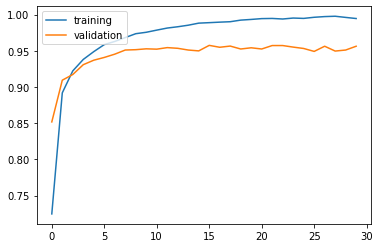

In [241]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## 틀리게 예측한 것들

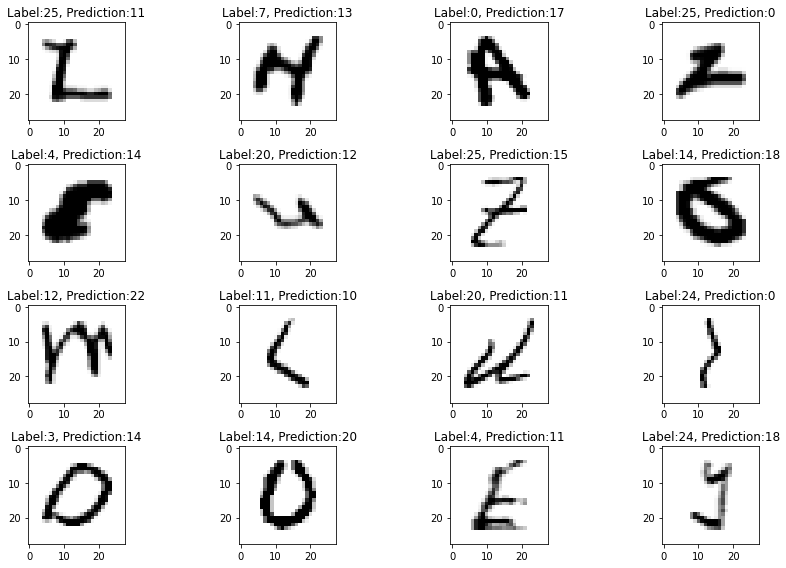

In [242]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

## 모델평가

In [243]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

9000/9000 [==============================] - 1s 102us/step
Test accuracy:  0.9546666741371155


# DNN

## 모델 세우기

In [244]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 10, kernel_size = (4,4), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 10, kernel_size = (4,4), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(26, activation = 'softmax'))
    
    adam = optimizers.Adam()
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [245]:
model = deep_cnn()

In [246]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 28, 28, 10)        170       
_________________________________________________________________
activation_65 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 14, 14, 10)        1610      
_________________________________________________________________
activation_66 (Activation)   (None, 14, 14, 10)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 7, 7, 10)          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 490)             

In [247]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 30, verbose = 1)

Train on 16800 samples, validate on 4200 samples
Epoch 1/30
16800/16800 [==============================] - 5s 322us/step - loss: 1.0645 - accuracy: 0.7079 - val_loss: 0.4458 - val_accuracy: 0.8810
Epoch 2/30
16800/16800 [==============================] - 6s 334us/step - loss: 0.3517 - accuracy: 0.9008 - val_loss: 0.2893 - val_accuracy: 0.9193
Epoch 3/30
16800/16800 [==============================] - 5s 326us/step - loss: 0.2477 - accuracy: 0.9306 - val_loss: 0.2638 - val_accuracy: 0.9267
Epoch 4/30
16800/16800 [==============================] - 5s 323us/step - loss: 0.2051 - accuracy: 0.9415 - val_loss: 0.2413 - val_accuracy: 0.9360
Epoch 5/30
16800/16800 [==============================] - 6s 364us/step - loss: 0.1744 - accuracy: 0.9518 - val_loss: 0.2136 - val_accuracy: 0.9405
Epoch 6/30
16800/16800 [==============================] - 6s 381us/step - loss: 0.1552 - accuracy: 0.9577 - val_loss: 0.2080 - val_accuracy: 0.9436
Epoch 7/30
16800/16800 [==============================] - 7s 41

## Train 추이

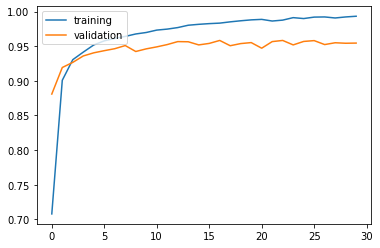

In [248]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training is rather unstable; accuracy falling down after around 80 epochs

## 틀리게 예측한 것들

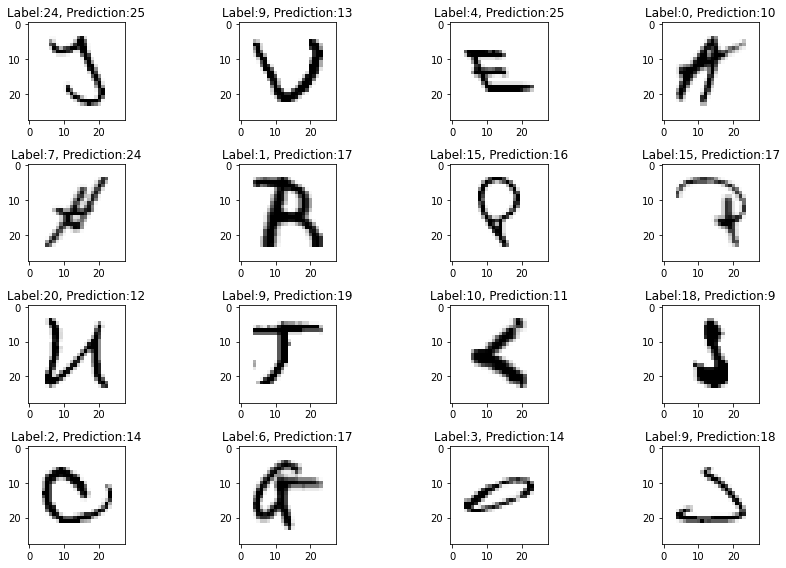

In [253]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

## 모델평가

In [250]:
results = model.evaluate(X_test, y_test)

9000/9000 [==============================] - 1s 128us/step


In [251]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9585555791854858
